# Ames Housing Dataset

For all parts below, answer all parts as shown in the Google document for Homework 3. Be sure to include both code that justifies your answer as well as text to answer the questions. We also ask that code be commented to make it easier to follow.

## **Data Collection and Preprocessing**


In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from subprocess import check_output
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn import preprocessing
from scipy import stats
from scipy.stats import norm, skew
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import os
from numpy import linalg
from numpy.linalg import norm
from scipy.spatial.distance import squareform, pdist
import sklearn
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.manifold.t_sne import (_joint_probabilities,
                                    _kl_divergence)
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=1dGXRGB6CZTfK8cn8ssJsbSOIkAmHpuug'
fluff, id = link.split('=')

In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('train.csv')  
train = pd.read_csv('train.csv')

In [0]:
link = 'https://drive.google.com/open?id=1-01AIlf4YwPks57p2dest3INwfrw9FRE'
fluff, id = link.split('=')

In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('test.csv')  
test = pd.read_csv('test.csv')

In [0]:
train["MSZoning_code"] = train["MSZoning"].astype('category').cat.codes
train["Utilities_code"] = train["Utilities"].astype('category').cat.codes
train["Neighborhood_code"] = train["Neighborhood"].astype('category').cat.codes
train["Condition1_code"] = train["Condition1"].astype('category').cat.codes
train["Condition2_code"] = train["Condition2"].astype('category').cat.codes
train["Heating_code"] = train["Heating"].astype('category').cat.codes
train["HeatingQC_code"] = train["HeatingQC"].astype('category').cat.codes
train["CentralAir_code"] = train["CentralAir"].astype('category').cat.codes
train["Electrical_code"] = train["Electrical"].astype('category').cat.codes
train["SaleType_code"] = train["SaleType"].astype('category').cat.codes
train["SaleCondition_code"] = train["SaleCondition"].astype('category').cat.codes

In [0]:
test["MSZoning_code"] = test["MSZoning"].astype('category').cat.codes
test["Utilities_code"] = test["Utilities"].astype('category').cat.codes
test["Neighborhood_code"] = test["Neighborhood"].astype('category').cat.codes
test["Condition1_code"] = test["Condition1"].astype('category').cat.codes
test["Condition2_code"] = test["Condition2"].astype('category').cat.codes
test["Heating_code"] = test["Heating"].astype('category').cat.codes
test["HeatingQC_code"] = test["HeatingQC"].astype('category').cat.codes
test["CentralAir_code"] = test["CentralAir"].astype('category').cat.codes
test["Electrical_code"] = test["Electrical"].astype('category').cat.codes
test["SaleType_code"] = test["SaleType"].astype('category').cat.codes
test["SaleCondition_code"] = test["SaleCondition"].astype('category').cat.codes

In [0]:
categorical_columns = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

numerical_columns = ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

cat_num_col = ["MSZoning_code", "Utilities_code", "Neighborhood_code", "Condition1_code", "Condition2_code", "Heating_code", "HeatingQC_code", "CentralAir_code", "Electrical_code", "SaleType_code", "SaleCondition_code"]

num_cols = numerical_columns + cat_num_col

In [0]:
train.loc[:,'LotFrontage'] = train['LotFrontage'].fillna(0)
train.loc[:,'MasVnrArea'] = train['MasVnrArea'].fillna(0)
train.loc[:,'GarageYrBlt'] = train['GarageYrBlt'].fillna(0)

In [0]:
test = test.fillna(0)

In [0]:
x = train[num_cols].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
train_norm = pd.DataFrame(x_scaled)
train_norm.columns = num_cols

In [0]:
x = train[['Id','SalePrice']].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
train_sp_norm = pd.DataFrame(x_scaled)
train_sp_norm.columns = ['Id','SalePrice']

## Part 1 - Pairwise Correlations

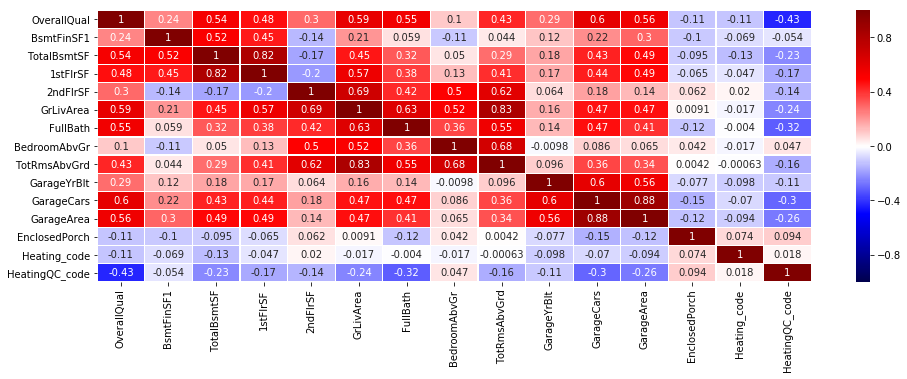

In [0]:
# visualization
plt.figure(figsize = (16,5))
sns.heatmap(train[[x for x in train.columns if x in ['EnclosedPorch', 'BsmtFinSF1', 'GarageYrBlt', '1stFlrSF', 'OverallQual', 'TotalBsmtSF',
                                                     'FullBath', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotRmsAbvGrd', '2ndFlrSF', 'BedroomAbvGr',
                                                    'Heating_code', 'HeatingQC_code']]].corr(),
            vmin=-1, vmax=1, cmap='seismic', linewidths=0.2, annot=True);

The most positive correlations are GrLivArea, 1stFlrSF, OverallQual, TotalBsmtSF, TotalRmsAbvGrd, GarageCars and GarageArea.
The most negative correlations are HeatingQC, EnclosedPorch and Heating.

## Part 2 - Informative Plots

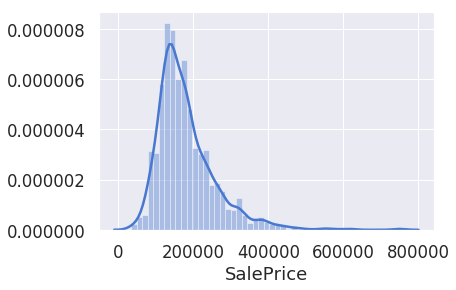

In [0]:
# Plot 1

sns.distplot(train['SalePrice']);

In [0]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

The standard deviation of SalePrice is very less and the mean is at 180921.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


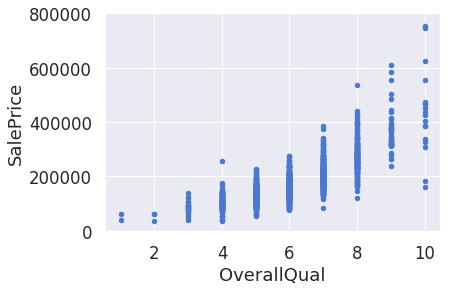

In [0]:
# Plot 2
data = pd.concat([train['SalePrice'], train['OverallQual']], axis=1)
data.plot.scatter(x='OverallQual', y='SalePrice', ylim=(0,800000));

SalePrice tends to increase as the OverallQual increases.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


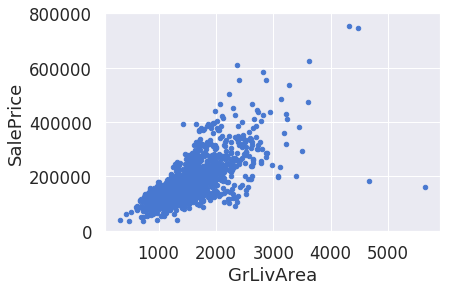

In [0]:
data = pd.concat([train['SalePrice'], train['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000));

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


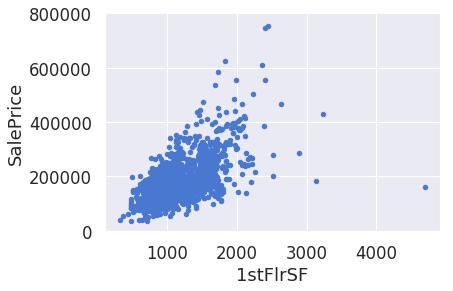

In [0]:
data = pd.concat([train['SalePrice'], train['1stFlrSF']], axis=1)
data.plot.scatter(x='1stFlrSF', y='SalePrice', ylim=(0,800000));

SalePrice increases more linearily with GrLiveArea than with 1stFlrSF.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


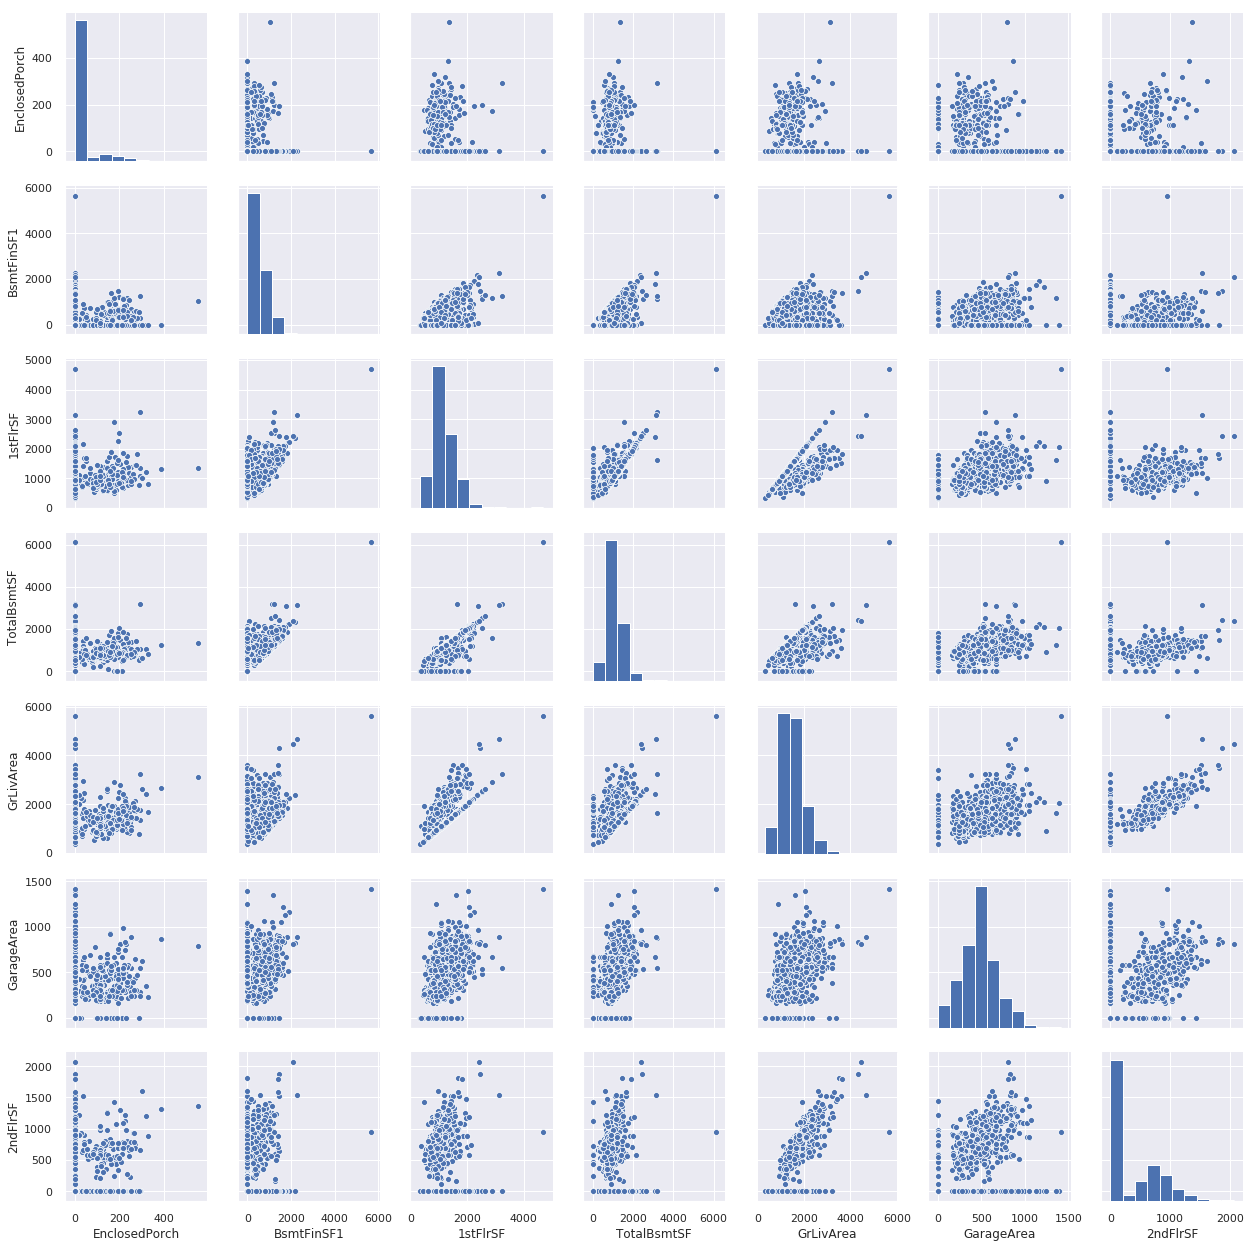

In [0]:
# Plot 3
sns.set()
sns.pairplot(train[['EnclosedPorch', 'BsmtFinSF1', '1stFlrSF', 'TotalBsmtSF',
                    'GrLivArea', 'GarageArea', '2ndFlrSF']], size = 2.5)
plt.show();

GrLiveArea, 1stFlrSF and TotalBsmtSF are expected to add more significance to our analysis.

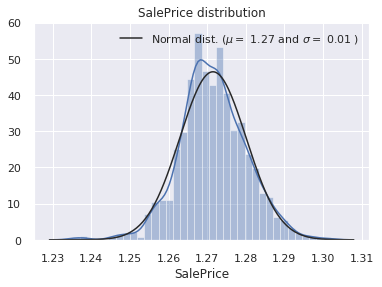

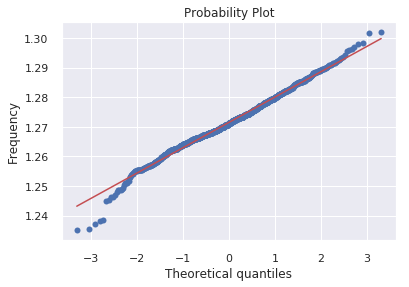

In [0]:
# Plot 4
train["SalePrice"] = np.log1p(train["SalePrice"]) 
plt.title('SalePrice distribution')
sns.distplot(train['SalePrice'] , fit=norm)
(mu, sigma) = norm.fit(train['SalePrice'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.ylabel('Frequency')
plt.show()

Data is good and normally distributed, rather than being skewed.

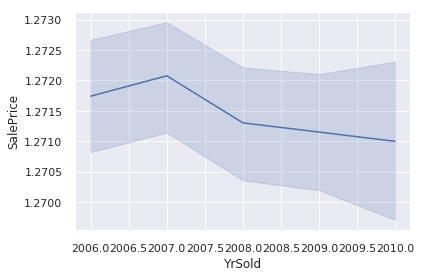

In [0]:
# Plot 5
sns.lineplot(x="YrSold", y="SalePrice", data=train)

The SalePrice is facing a steady decrease after 2007.

## Part 3 - Handcrafted Scoring Function

In [0]:
scoring_features = train[['MSZoning_code','MSSubClass','Utilities_code','Neighborhood_code','Condition1_code','Condition2_code','OverallQual','OverallCond','YearRemodAdd','Heating_code',
'HeatingQC_code','CentralAir_code','Electrical_code','GrLivArea','FullBath','BedroomAbvGr','GarageArea','YrSold','SaleType_code','SaleCondition_code']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faee454d128>,
      dtype=object)

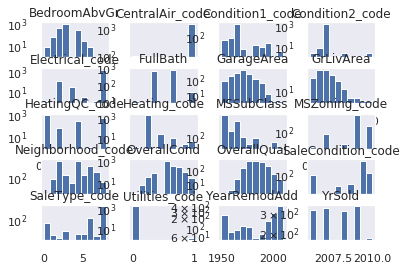

In [0]:
scoring_features.hist(log=True, grid=False)

In [0]:
x = scoring_features.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
scoring_feat = pd.DataFrame(x_scaled)

In [0]:
scoring_feat.columns = ['MSZoning_code','MSSubClass','Utilities_code','Neighborhood_code','Condition1_code','Condition2_code','OverallQual','OverallCond','YearRemodAdd','Heating_code',
'HeatingQC_code','CentralAir_code','Electrical_code','GrLivArea','FullBath','BedroomAbvGr','GarageArea','YrSold','SaleType_code','SaleCondition_code']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faee52db400>,
      dtype=object)

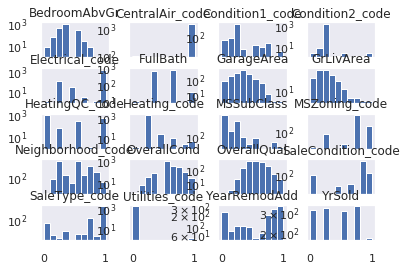

In [0]:
scoring_feat.hist(log=True, grid=False)

In [0]:
from scipy.stats import zscore
cleaned_scoring_features = scoring_feat.apply(zscore)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faee5e59f60>,
      dtype=object)

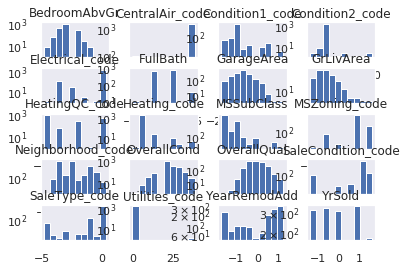

In [0]:
cleaned_scoring_features.hist(log=True, grid=False)

In [0]:
scores = cleaned_scoring_features['MSZoning_code'] + (0.3 * cleaned_scoring_features['MSSubClass']) + (0.7 * cleaned_scoring_features['Utilities_code']) + (2 * cleaned_scoring_features['Neighborhood_code']) + cleaned_scoring_features['Condition1_code'] + cleaned_scoring_features['Condition2_code'] + (0.7 * cleaned_scoring_features['OverallQual']) + (0.7 * cleaned_scoring_features['OverallCond']) + (0.3 * cleaned_scoring_features['YearRemodAdd']) + (0.5 * cleaned_scoring_features['Heating_code']) + (0.5 * cleaned_scoring_features['HeatingQC_code']) + (0.5 * cleaned_scoring_features['CentralAir_code']) + (0.5 * cleaned_scoring_features['Electrical_code']) + (0.4 * cleaned_scoring_features['GrLivArea']) + (0.4 * cleaned_scoring_features['FullBath']) + (0.4 * cleaned_scoring_features['BedroomAbvGr'])  + (0.4 * cleaned_scoring_features['GarageArea']) + (0.2 * cleaned_scoring_features['YrSold']) + (0.2 * cleaned_scoring_features['SaleType_code']) + (0.2 * cleaned_scoring_features['SaleCondition_code'])

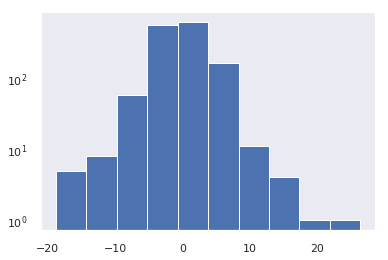

In [0]:
scores.hist(log=True, grid=False)

In [0]:
most_des_keys = scores.nlargest(10).index.values
least_des_keys = scores.nsmallest(10).index.values

What is the ten most desirable houses?

In [0]:
train['Id'][most_des_keys]

944      945
548      549
1003    1004
825      826
523      524
1230    1231
583      584
932      933
29        30
237      238
Name: Id, dtype: int64

What is the ten least desirable houses?

In [0]:
train['Id'][least_des_keys]

88        89
916      917
9         10
375      376
533      534
495      496
1279    1280
812      813
30        31
1321    1322
Name: Id, dtype: int64

The below variable were ranked and given weights based on their expectation to affect the desirability of the properties.

Rank | Weight | Variable 
---|---|:---
1  | 2 | Neighborhood
2  |  1|  Condition1
3   | 1 | Condition2
4 |  1  |MSZoning
5|  0.7 |Utilities
6 | 0.7 |OverallQual
7  |0.7 |OverallCond
8  |0.5 |Electrical
9 | 0.5 |CentralAir
10| 0.5 |Heating
11 |0.5 |HeatingQC
12 |0.4 |GrLivArea
13 |0.4 |BedroomAbvGr
14 |0.4 |FullBath
15 |0.4 |GarageArea
16 |0.3 |MSSubClass
17 |0.3 |YearRemodAdd
18 |0.2 |YrSold
19 |0.2 |SaleType
20 |0.2| SaleCondition

The final curve is normally distributed as per our expectation after the weights are added to the selected features.

## Part 4 - Pairwise Distance Function

In [0]:
# distance function
from sklearn.metrics.pairwise import euclidean_distances
edis = euclidean_distances(train[num_cols])
sorted_properties = train[num_cols].to_numpy()[np.argsort(edis)]

In [0]:
sorted_properties

array([[[1.000e+00, 6.000e+01, 6.500e+01, ..., 4.000e+00, 8.000e+00,
         4.000e+00],
        [2.130e+02, 6.000e+01, 7.200e+01, ..., 4.000e+00, 6.000e+00,
         5.000e+00],
        [2.570e+02, 6.000e+01, 6.400e+01, ..., 4.000e+00, 8.000e+00,
         4.000e+00],
        ...,
        [2.500e+02, 5.000e+01, 0.000e+00, ..., 4.000e+00, 8.000e+00,
         4.000e+00],
        [3.360e+02, 1.900e+02, 0.000e+00, ..., 4.000e+00, 8.000e+00,
         4.000e+00],
        [3.140e+02, 2.000e+01, 1.500e+02, ..., 4.000e+00, 8.000e+00,
         4.000e+00]],

       [[2.000e+00, 2.000e+01, 8.000e+01, ..., 4.000e+00, 8.000e+00,
         4.000e+00],
        [3.960e+02, 2.000e+01, 6.800e+01, ..., 4.000e+00, 8.000e+00,
         4.000e+00],
        [4.560e+02, 2.000e+01, 8.000e+01, ..., 4.000e+00, 8.000e+00,
         4.000e+00],
        ...,
        [2.500e+02, 5.000e+01, 0.000e+00, ..., 4.000e+00, 8.000e+00,
         4.000e+00],
        [3.360e+02, 1.900e+02, 0.000e+00, ..., 4.000e+00, 8.000e+00,
   

Euclidean distance metric has been used to compute the pairwise distance function between the rows of the dataframe under analysis. The correctness of the distance function can be verified from the results of Clustering.

## Part 5 - Clustering

In [0]:
kmeans = KMeans(n_clusters=13, random_state=0).fit(train[num_cols])
Y=kmeans.labels_
z = pd.DataFrame(Y.tolist())
digits_proj = TSNE(random_state=25111993).fit_transform(train[num_cols])

In [0]:
def scatter(x, colors):
    palette = np.array(sns.color_palette("hls", 13))

    f = plt.figure(figsize=(16, 16))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=120,
                    c=palette[colors.astype(np.int)])
    ax.axis('off')
    ax.axis('tight')
    txts = []
    for i in range(13):
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=20)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


(<Figure size 1152x1152 with 1 Axes>,
 [Text(18.51646, 1.3220484, '0'),
  Text(71.44564, 25.645357, '1'),
  Text(74.5518, 23.319504, '2'),
  Text(-5.795681, -11.308593, '3'),
  Text(54.504524, 12.641462, '4'),
  Text(-64.77197, 5.4123363, '5'),
  Text(67.17952, 17.320896, '6'),
  Text(71.01668, 25.794357, '7'),
  Text(73.116425, 20.223791, '8'),
  Text(72.22908, 25.292221, '9'),
  Text(37.965603, 6.028172, '10'),
  Text(73.86335, 24.523647, '11'),
  Text(-31.413586, -9.487701, '12')])

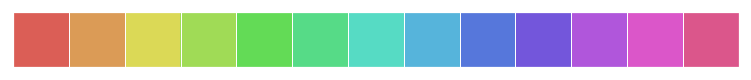

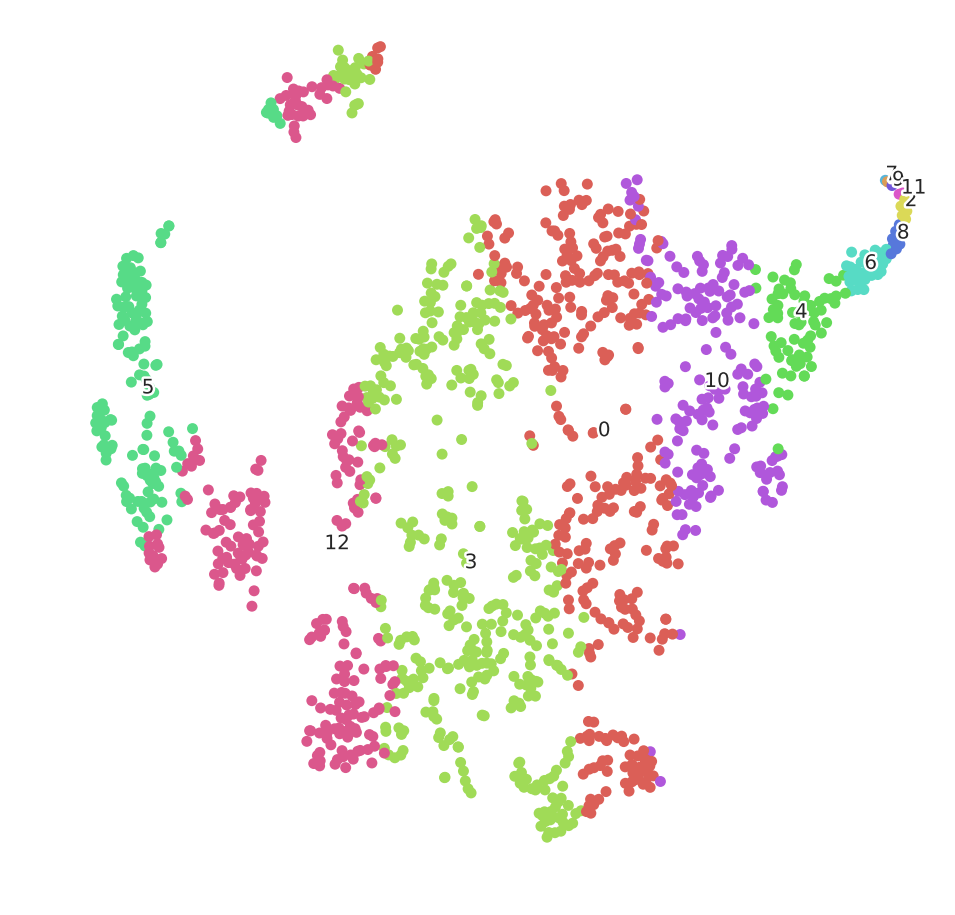

In [0]:
print(list(range(0,13)))
sns.palplot(np.array(sns.color_palette("hls", 13)))
scatter(digits_proj, Y)

The neighbourhood is very well separated between clusters. This confirms the correctness of our distance function because Euclidean distance is employed in K-Means Clustering.

## Part 6 - Linear Regression

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_norm, train_sp_norm['SalePrice'], random_state = 42, test_size = .33)
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)
predictions = model.predict(X_test)

In [0]:
from sklearn.metrics import mean_squared_error, accuracy_score
print('RMSE is {}'.format(mean_squared_error(y_test, predictions)))

RMSE is 0.002976672210665295


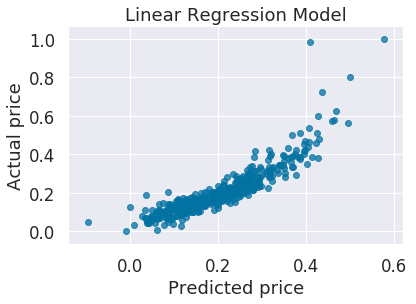

In [0]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha= 0.75, color = 'b')

plt.xlabel('Predicted price')
plt.ylabel('Actual price')
plt.title('Linear Regression Model')
plt.show()

The linear regression worked pretty well with the RMSE of only 0.003. All the highly correlated numerical and categorical variables found to be useful from the preprocessing stage were taken and used in building the model.

## Part 7 - External Dataset

A relevant external dataset was found at https://www.cityofames.org/home/showdocument?id=1061. It is used for the further analysis in this section.

In [0]:
# TODO: code to import external dataset and test
link = 'https://drive.google.com/open?id=1rcDmr2DGdjcUK-fcaKD30kY-izh2wKyt'
fluff, id = link.split('=')

In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('AmesRealEstateData.csv')  
ext_ds = pd.read_csv('AmesRealEstateData.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,17,35,36,40,81) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
ext_ds['Neighborhood'].unique()

array([nan, 'Gilbert', 'HaydnLk', 'N Ames', 'Blmngtn', 'Stonebr',
       'NW Ames', 'Somerst', 'IOCondo', "Br'Dale", 'NoPkVil', 'NRidgHt',
       'NoRidge', 'SawyerW', 'Sawyer', 'Veenker', 'Greens', 'MsCondo',
       'BrkSide', 'OldTown', 'IDOT&RR', 'ClearCr', 'S&W ISU', 'IOC ISU',
       'Edwards', 'CollgCr', 'Landmrk', 'DakotaR', 'WllwCr1', 'WllwCr2',
       'HRCondo', 'Crawfor', 'Bluestm', 'Mitchel', 'Timber', 'GrnHill',
       'Wessex', 'MeadowV'], dtype=object)

In [0]:
train['Neighborhood'].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

Our external dataset has more unique values of Neighborhood than our input dataset.

In [0]:
train[train.columns.intersection(ext_ds.columns)].columns

Index(['LotArea', 'Neighborhood', 'BldgType', 'HouseStyle', 'RoofMatl',
       'MasVnrType', 'Foundation', 'Heating', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageType', 'GarageArea', 'PoolArea', 'SaleType', 'SalePrice'],
      dtype='object')

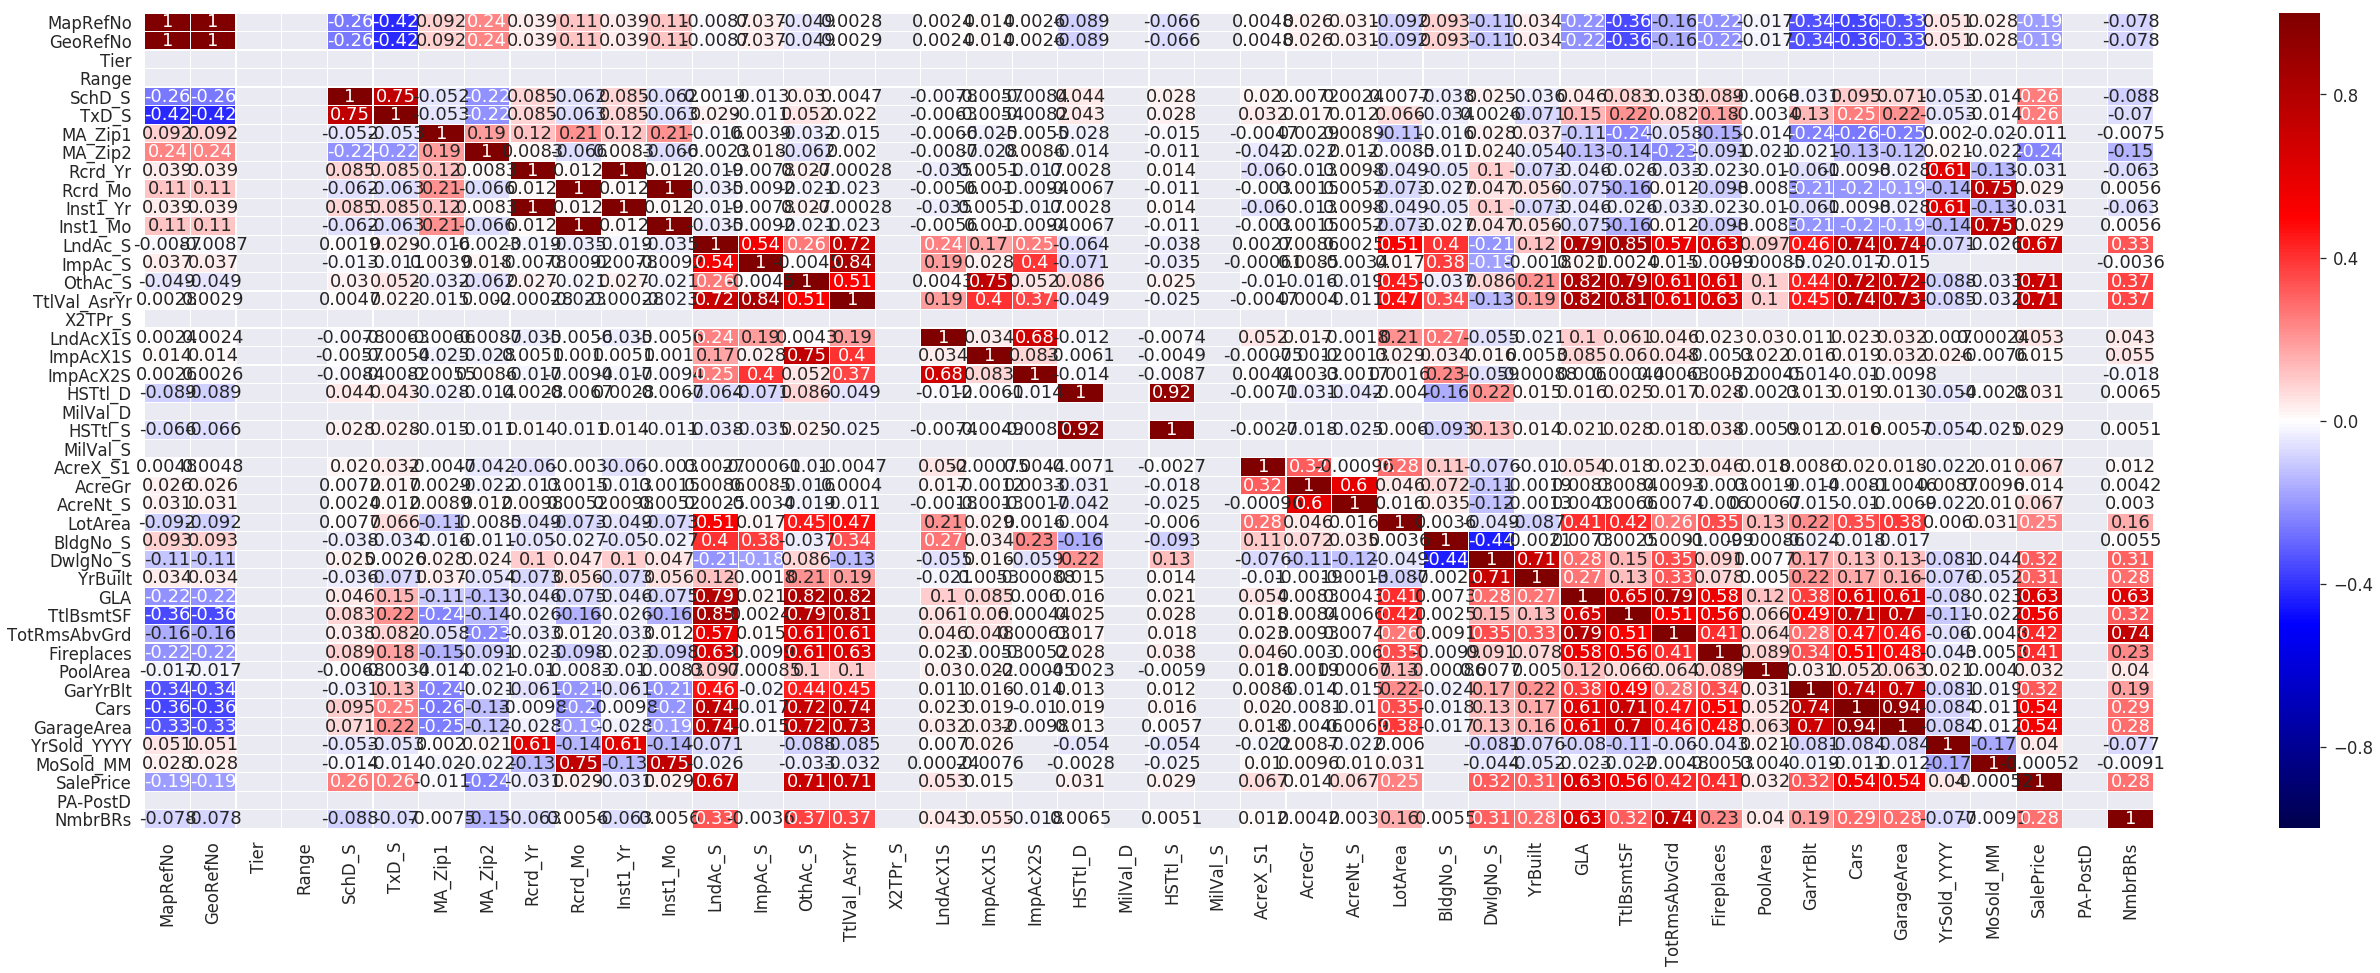

In [0]:
plt.figure(figsize = (45,15))
sns.heatmap(ext_ds.corr(),
            vmin=-1, vmax=1, cmap='seismic', linewidths=0.2, annot=True)

Correlation matrix is similar to the existing input dataset.

In [0]:
new_df = pd.merge(train, ext_ds,  how='left', left_on=['Neighborhood', 'BldgType', 'HouseStyle', 'RoofMatl',
       'MasVnrType', 'GarageType'], right_on = ['Neighborhood', 'BldgType', 'HouseStyle', 'RoofMatl',
       'MasVnrType', 'GarageType'])

In [0]:
new_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea_x', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities',
       ...
       'PA-Nmbr', 'PA-PreD', 'PA-Strt', 'PA-StSfx', 'PA-PostD', 'PA-UnTyp',
       'PA-UntNo', 'Date', 'Source', 'NmbrBRs'],
      dtype='object', length=177)

In [0]:
new_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea_x,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation_x,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating_x,...,MilVal_D,HSTtl_S,MilVal_S,AcreX_S1,AcreGr,AcreNt_S,LotArea_y,ParType,BldgNo_S,DwlgNo_S,YrBuilt,Foundation_y,Ext1,Ext2,Heating_y,Central Air,GLA,TtlBsmtSF,TotRmsAbvGrd_y,Fireplaces_y,PoolArea_y,GarYrBlt,Cars,GarageArea_y,YrSold_YYYY,MoSold_MM,SalePrice_y,SaleType_y,SaleCond,ParclRel,PA-Nmbr,PA-PreD,PA-Strt,PA-StSfx,PA-PostD,PA-UnTyp,PA-UntNo,Date,Source,NmbrBRs
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,nan
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,nan
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,nan
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,nan
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,nan


In [0]:
new_df.dtypes.value_counts()

object     84
float64    48
int64      34
int8       11
dtype: int64

In [0]:
new_num_cols = new_df.select_dtypes([np.number]).columns

In [0]:
empty_columns = len(new_df[new_num_cols]) - new_df[new_num_cols].count()

In [0]:
empty_columns = empty_columns[empty_columns==1460]

In [0]:
empty_columns

MapRefNo          1460
GeoRefNo          1460
Tier              1460
Range             1460
SchD_S            1460
TxD_S             1460
MA_Zip1           1460
MA_Zip2           1460
Rcrd_Yr           1460
Rcrd_Mo           1460
Inst1_Yr          1460
Inst1_Mo          1460
LndAc_S           1460
ImpAc_S           1460
OthAc_S           1460
TtlVal_AsrYr      1460
X2TPr_S           1460
LndAcX1S          1460
ImpAcX1S          1460
ImpAcX2S          1460
HSTtl_D           1460
MilVal_D          1460
HSTtl_S           1460
MilVal_S          1460
AcreX_S1          1460
AcreGr            1460
AcreNt_S          1460
LotArea_y         1460
BldgNo_S          1460
DwlgNo_S          1460
YrBuilt           1460
GLA               1460
TtlBsmtSF         1460
TotRmsAbvGrd_y    1460
Fireplaces_y      1460
PoolArea_y        1460
GarYrBlt          1460
Cars              1460
GarageArea_y      1460
YrSold_YYYY       1460
MoSold_MM         1460
SalePrice_y       1460
PA-PostD          1460
NmbrBRs    

In [0]:
new_df = new_df.drop(empty_columns.keys(), axis=1)

In [0]:
new_df.shape

(1460, 133)

Though the external dataframe has more matching variables in it with the input dataframe, it is not taken for further studies because of the wide prevalence of NaN values and also because the characteristics of the new dataset is almost same as the already existing one.

## Part 8 - Permutation Test

In [0]:
# TODO: code for all permutation tests
# Model 1
x, y = train[['OverallQual']], train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(x, y)

0.6256160462724514

In [0]:
# RMSE 1
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(np.log(y_test), np.log(y_pred)))

0.24751787563961294

In [0]:
# Permutation test 1
from sklearn.model_selection import permutation_test_score
from sklearn.svm import SVR
from sklearn.model_selection import StratifiedKFold


svr = SVR()
#cv = StratifiedKFold(2)
score, permutation_scores, pvalue = permutation_test_score(
    svr, train[['OverallQual']], train['SalePrice'], cv=None, n_permutations=100, n_jobs=1, verbose=1)

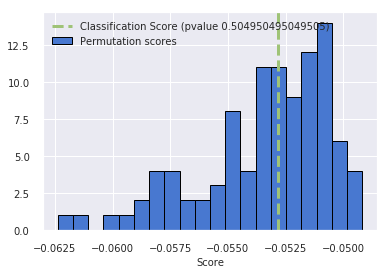

In [0]:
plt.hist(permutation_scores, 20, label='Permutation scores',
         edgecolor='black')
ylim = plt.ylim()
plt.plot(2 * [score], ylim, '--g', linewidth=3,
         label='Classification Score'
         ' (pvalue %s)' % pvalue)
plt.ylim(ylim)
plt.legend(loc=2, prop={'size': 10})
plt.xlabel('Score', fontsize=10)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.show()

In [0]:
# Model 2
x, y = train[['TotalBsmtSF']], train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(x, y)

0.373435234775773

In [0]:
# RMSE 2
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(np.log(y_test), np.log(y_pred)))

0.3321423985123688

In [0]:
# Permutation test 2
from sklearn.model_selection import permutation_test_score
from sklearn.svm import SVR
from sklearn.model_selection import StratifiedKFold


svr = SVR()
score, permutation_scores, pvalue = permutation_test_score(
    svr, x, y, cv=None, n_permutations=100, n_jobs=1, verbose=1)

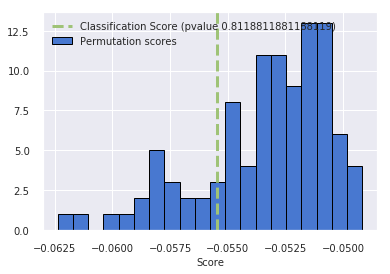

In [0]:
plt.hist(permutation_scores, 20, label='Permutation scores',
         edgecolor='black')
ylim = plt.ylim()
plt.plot(2 * [score], ylim, '--g', linewidth=3,
         label='Classification Score'
         ' (pvalue %s)' % pvalue)
plt.ylim(ylim)
plt.legend(loc=2, prop={'size': 10})
plt.xlabel('Score', fontsize=10)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.show()

In [0]:
# Model 3
x, y = train[['YearBuilt']], train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(x, y)

0.27326900448573577

In [0]:
# RMSE 3
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(np.log(y_test), np.log(y_pred)))

0.3266731459875436

In [0]:
# Permutation test 3
from sklearn.model_selection import permutation_test_score
from sklearn.svm import SVR
from sklearn.model_selection import StratifiedKFold


svr = SVR()
score, permutation_scores, pvalue = permutation_test_score(
    svr, x, y, cv=None, n_permutations=100, n_jobs=1, verbose=1)

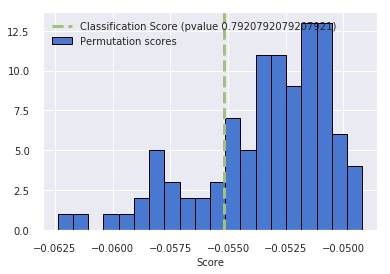

In [0]:
plt.hist(permutation_scores, 20, label='Permutation scores',
         edgecolor='black')
ylim = plt.ylim()
plt.plot(2 * [score], ylim, '--g', linewidth=3,
         label='Classification Score'
         ' (pvalue %s)' % pvalue)
plt.ylim(ylim)
plt.legend(loc=2, prop={'size': 10})
plt.xlabel('Score', fontsize=10)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.show()

In [0]:
# Model 4
x, y = train[['GrLivArea']], train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(x, y)

0.5016809548436623

In [0]:
# RMSE 4
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(np.log(y_test), np.log(y_pred)))

0.2724062958769451

In [0]:
# Permutation test 4
from sklearn.model_selection import permutation_test_score
from sklearn.svm import SVR
from sklearn.model_selection import StratifiedKFold


svr = SVR()
score, permutation_scores, pvalue = permutation_test_score(
    svr, x, y, cv=None, n_permutations=100, n_jobs=1, verbose=1)

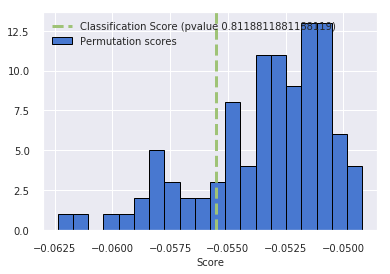

In [0]:
plt.hist(permutation_scores, 20, label='Permutation scores',
         edgecolor='black')
ylim = plt.ylim()
plt.plot(2 * [score], ylim, '--g', linewidth=3,
         label='Classification Score'
         ' (pvalue %s)' % pvalue)
plt.ylim(ylim)
plt.legend(loc=2, prop={'size': 10})
plt.xlabel('Score', fontsize=10)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.show()

In [0]:
# Model 5
x, y = train[['1stFlrSF']], train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(x, y)

0.34943533756120204

In [0]:
# RMSE 5
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(np.log(y_test), np.log(y_pred)))

0.0055513653906219505

In [0]:
# Permutation test 5
from sklearn.model_selection import permutation_test_score
from sklearn.svm import SVR
from sklearn.model_selection import StratifiedKFold


svr = SVR()
score, permutation_scores, pvalue = permutation_test_score(
    svr, x, y, cv=None, n_permutations=100, n_jobs=1, verbose=1)

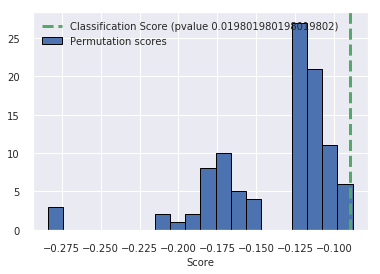

In [0]:
plt.hist(permutation_scores, 20, label='Permutation scores',
         edgecolor='black')
ylim = plt.ylim()
plt.plot(2 * [score], ylim, '--g', linewidth=3,
         label='Classification Score'
         ' (pvalue %s)' % pvalue)
plt.ylim(ylim)
plt.legend(loc=2, prop={'size': 10})
plt.xlabel('Score', fontsize=10)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.show()

In [0]:
# Model 6
x, y = train[['GarageCars']], train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(x, y)

0.4093051876783703

In [0]:
# RMSE 6
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(np.log(y_test), np.log(y_pred)))

0.37049874837273783

In [0]:
# Permutation test 6
from sklearn.model_selection import permutation_test_score
from sklearn.svm import SVR
from sklearn.model_selection import StratifiedKFold


svr = SVR()
score, permutation_scores, pvalue = permutation_test_score(
    svr, x, y, cv=None, n_permutations=100, n_jobs=1, verbose=1)

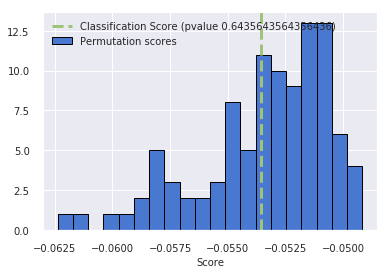

In [0]:
plt.hist(permutation_scores, 20, label='Permutation scores',
         edgecolor='black')
ylim = plt.ylim()
plt.plot(2 * [score], ylim, '--g', linewidth=3,
         label='Classification Score'
         ' (pvalue %s)' % pvalue)
plt.ylim(ylim)
plt.legend(loc=2, prop={'size': 10})
plt.xlabel('Score', fontsize=10)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.show()

In [0]:
# Model 7
x, y = train[['GarageArea']], train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(x, y)

0.3878252810375806

In [0]:
# RMSE 7
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(np.log(y_test), np.log(y_pred)))

0.3539016215649787

In [0]:
# Permutation test 7
from sklearn.model_selection import permutation_test_score
from sklearn.svm import SVR
from sklearn.model_selection import StratifiedKFold


svr = SVR()
score, permutation_scores, pvalue = permutation_test_score(
    svr, x, y, cv=None, n_permutations=100, n_jobs=1, verbose=1)

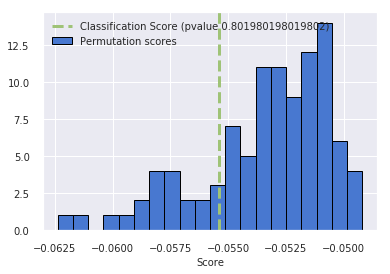

In [0]:
plt.hist(permutation_scores, 20, label='Permutation scores',
         edgecolor='black')
ylim = plt.ylim()
plt.plot(2 * [score], ylim, '--g', linewidth=3,
         label='Classification Score'
         ' (pvalue %s)' % pvalue)
plt.ylim(ylim)
plt.legend(loc=2, prop={'size': 10})
plt.xlabel('Score', fontsize=10)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.show()

In [0]:
# Model 8
x, y = train[['TotRmsAbvGrd']], train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(x, y)

0.2847478594424886

In [0]:
# RMSE 8
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(np.log(y_test), np.log(y_pred)))

0.32928416566620067

In [0]:
# Permutation test 8
from sklearn.model_selection import permutation_test_score
from sklearn.svm import SVR
from sklearn.model_selection import StratifiedKFold


svr = SVR()
score, permutation_scores, pvalue = permutation_test_score(
    svr, x, y, cv=None, n_permutations=100, n_jobs=1, verbose=1)

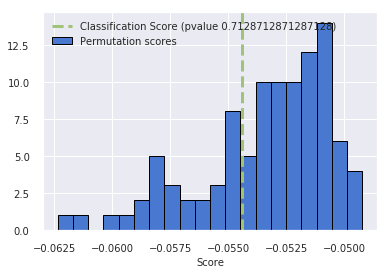

In [0]:
plt.hist(permutation_scores, 20, label='Permutation scores',
         edgecolor='black')
ylim = plt.ylim()
plt.plot(2 * [score], ylim, '--g', linewidth=3,
         label='Classification Score'
         ' (pvalue %s)' % pvalue)
plt.ylim(ylim)
plt.legend(loc=2, prop={'size': 10})
plt.xlabel('Score', fontsize=10)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.show()

In [0]:
# Model 9
x, y = train[['FullBath']], train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(x, y)

0.31410803570051227

In [0]:
# RMSE 9
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(np.log(y_test), np.log(y_pred)))

0.3502505823481588

In [0]:
# Permutation test 9
from sklearn.model_selection import permutation_test_score
from sklearn.svm import SVR
from sklearn.model_selection import StratifiedKFold


svr = SVR()
score, permutation_scores, pvalue = permutation_test_score(
    svr, x, y, cv=None, n_permutations=100, n_jobs=1, verbose=1)

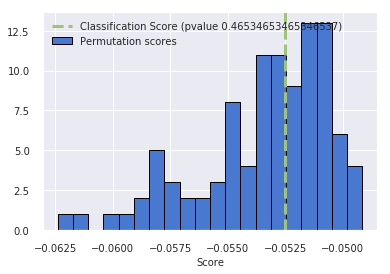

In [0]:
plt.hist(permutation_scores, 20, label='Permutation scores',
         edgecolor='black')
ylim = plt.ylim()
plt.plot(2 * [score], ylim, '--g', linewidth=3,
         label='Classification Score'
         ' (pvalue %s)' % pvalue)
plt.ylim(ylim)
plt.legend(loc=2, prop={'size': 10})
plt.xlabel('Score', fontsize=10)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.show()

In [0]:
# Model 10
x, y = train[['YearRemodAdd']], train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(x, y)

0.2571301436098371

In [0]:
# RMSE 10
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(np.log(y_test), np.log(y_pred)))

0.33575185114733697

In [0]:
# Permutation test 10
from sklearn.model_selection import permutation_test_score
from sklearn.svm import SVR
from sklearn.model_selection import StratifiedKFold


svr = SVR()
score, permutation_scores, pvalue = permutation_test_score(
    svr, x, y, cv=None, n_permutations=100, n_jobs=1, verbose=1)

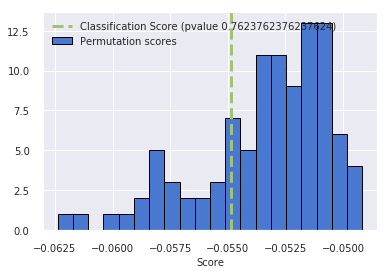

In [0]:
plt.hist(permutation_scores, 20, label='Permutation scores',
         edgecolor='black')
ylim = plt.ylim()
plt.plot(2 * [score], ylim, '--g', linewidth=3,
         label='Classification Score'
         ' (pvalue %s)' % pvalue)
plt.ylim(ylim)
plt.legend(loc=2, prop={'size': 10})
plt.xlabel('Score', fontsize=10)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.show()

From the above analysis, it can be seen that "1stFlrSF" is the most insignificant variable of all the selected ones. TotalBsmtSF, GarageArea, GrLivArea, etc. are the good candidates for prediction. The significance of many other variables are similar implying their overall effect in predicting the SalePrice. 

## Part 9 - Final Result

In [0]:
y_train = train['SalePrice']
X_train = train[num_cols].drop(['Id'], axis = 1)
X_test = test[num_cols].drop(['Id'], axis = 1)

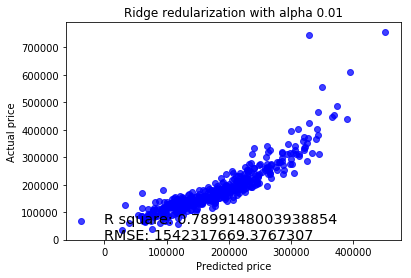

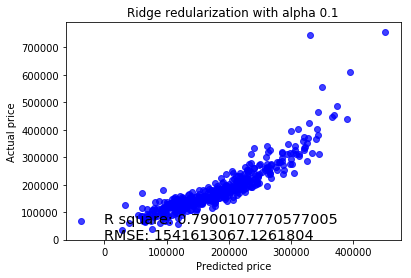

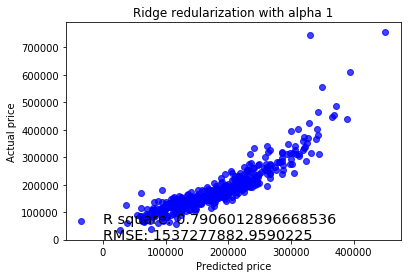

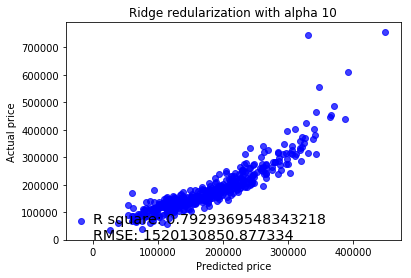

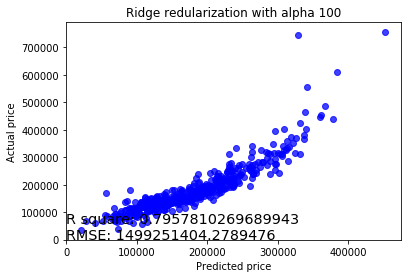

In [0]:
for i in range(-2, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha = alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)
    
    plt.scatter(preds_ridge, y_test, alpha= 0.75, c= 'b')
    plt.xlabel('Predicted price')
    plt.ylabel('Actual price')
    plt.title('Ridge redularization with alpha {}'.format(alpha))
    overlay = 'R square: {} \nRMSE: {}'.format(ridge_model.score(X_test, y_test), mean_squared_error(y_test, preds_ridge))
    plt.annotate(s = overlay, xy = (12.1, 10.6), size = 'x-large')
    plt.show()

Since both Linear and Ridge Regressions tends to produce similar results, Gradient Boosting Regression is selected as the next model.

In [0]:
from sklearn.ensemble import GradientBoostingRegressor

In [0]:
est = GradientBoostingRegressor(n_estimators= 1000, max_depth= 5, learning_rate= .01)
est.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
y_train_predict = est.predict(X_train)
y_test_predict = est.predict(X_test)

In [0]:
y_test_predict

array([120295.27069346, 165663.49548405, 178604.35899812, ...,
       178084.97915179, 126493.49945443, 244667.12585693])

In [0]:
test['SalePrice'] = y_test_predict
test[['Id','SalePrice']].to_csv('submit_kaggle_hw3.csv')
from google.colab import files
files.download("submit_kaggle_hw3.csv")

Gradient boosting is a regression technique which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. This has proven to be better than both linear and ridge regressions by producing the least RMSE value of 0.14.

Kaggle Link: https://www.kaggle.com/aiswaryalakshmi

Highest Rank: 2729

Score: 0.14536

Number of entries: 2

In [0]:
#@title Kaggle Rank
%%html
<iframe src = "https://drive.google.com/uc?id=1Ek8FbSRp_UGtprj7JisCzEh-9hS88UVU" width= "1200" height = "1000"></iframe>